### Exploring Weather Trends

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df_local = pd.read_csv('local.csv')
df_global = pd.read_csv('global.csv')



In [96]:
# replace missing data by using the forward filling method.
df_local['avg_temp'].fillna( method ='ffill', inplace = True)
df_global['avg_temp'].fillna( method ='ffill', inplace = True)

# find the duplicates and drop them
df_local.drop_duplicates(inplace = True)
df_global.drop_duplicates(inplace = True)


In [97]:
#calculating the Moving average 
window_size = 5
windows = df_local['avg_temp'].rolling(window_size)
local_moving_average = windows.mean()
df_local['local_moving_average'] = local_moving_average

windows = df_global['avg_temp'].rolling(window_size)
global_moving_average = windows.mean()
df_global['global_moving_average'] = global_moving_average


In [98]:
# combine two tables together
df_global.columns = ['year','global_avg_temp','global_moving_average']
df_local = df_local.loc[:,['year','avg_temp','local_moving_average']]
df_local.columns = ['year','local_avg_temp','local_moving_average']
df = pd.merge(df_global,df_local,how = 'outer')

In [99]:
df = df.sort_values(by=['year'])
df.head()

,year,global_avg_temp,global_moving_average,local_avg_temp,local_moving_average
266,1743,NaN,NaN,10.57,NaN
267,1744,NaN,NaN,18.49,NaN
268,1745,NaN,NaN,10.84,NaN
269,1746,NaN,NaN,10.84,NaN
270,1747,NaN,NaN,10.84,12.316


In [100]:
# drop the rows with NaNs.
df = df.dropna()
df.head()

,year,global_avg_temp,global_moving_average,local_avg_temp,local_moving_average
4,1754,8.47,7.868,17.14,16.460
5,1755,8.36,7.796,15.01,15.922
6,1756,8.85,7.970,17.27,15.688
7,1757,9.02,8.618,16.80,16.658
8,1758,6.74,8.288,15.60,16.364


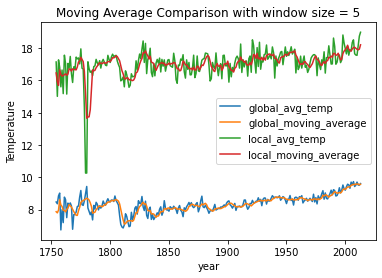

In [101]:
df.plot(x = 'year', kind = 'line');
plt.ylabel('Temperature');
plt.title('Moving Average Comparison with window size = 5');